In [2]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()
data= digits.data

In [3]:
data.shape


(1797, 64)

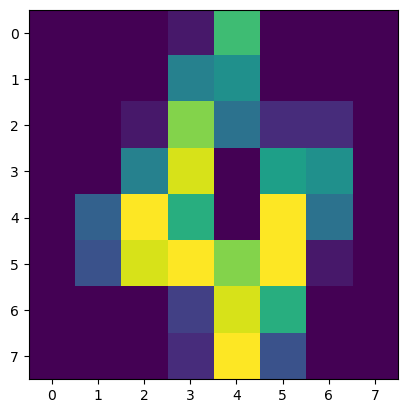

In [4]:
im1 = data[4]
im1 =im1.reshape(8,8)
plt.imshow(im1)

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

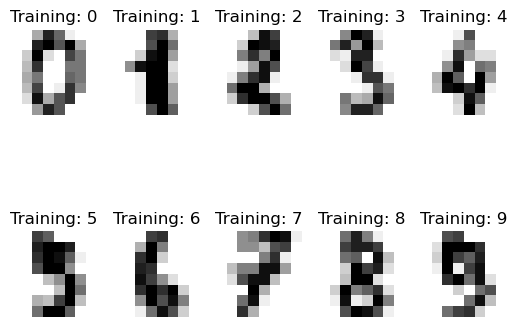

In [8]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

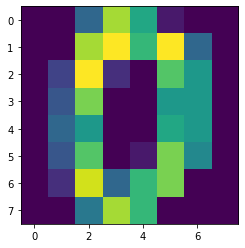

In [8]:
plt.imshow(images_and_labels[0][0])

In [9]:
num_examples = len(digits.data)
num_examples

1797

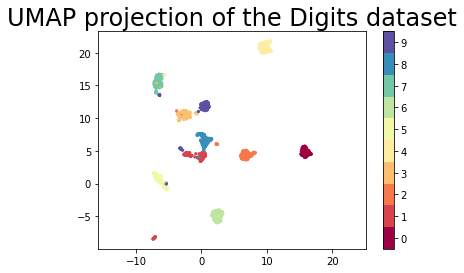

In [10]:
import matplotlib.pyplot as plt 
import numpy as np
import umap
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)
embedding = reducer.transform(digits.data)
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [11]:
data.shape


(1797, 64)

In [12]:
digits.target.shape

(1797,)

#### First we take out all pictures with a certain lablel then. Let group(A) be all images with label A.
#### This command gets all image with label 0:
#### digits.data[digits.target==0]

#### As a matrix. with rows being images and columns pixels. We take the mean of each corresponding corresponding pixels in images. This will give us a mean image. 





In [13]:
mean_imgs = np.array([digits.data[digits.target==i].mean(axis=0) for i in range(10)])


## Norm
#### Here we calculate L2 norm

In [14]:
L2_norms =  np.array([ np.linalg.norm(row) for row in digits.data])
L2_norms

array([55.40758071, 64.87680633, 66.24198065, ..., 71.3582511 ,
       65.69627082, 70.27090436])

In [15]:
L2_norms.shape

(1797,)

### Here we calculate normed mean image and normed data

In [16]:
normed_data = np.array([row/np.linalg.norm(row)for row in digits.data])
normed_data

array([[0.        , 0.        , 0.09024036, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.15413829, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.24153867, 0.1358655 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.0140138 , ..., 0.08408278, 0.        ,
        0.        ],
       [0.        , 0.        , 0.03044313, ..., 0.18265877, 0.        ,
        0.        ],
       [0.        , 0.        , 0.14230641, ..., 0.17076769, 0.01423064,
        0.        ]])

In [17]:
norm_mean_ims=  np.array([ row/np.linalg.norm(row) for row in mean_imgs])
norm_mean_ims

array([[0.00000000e+00, 3.92796401e-04, 7.31583296e-02, 2.28902102e-01,
        1.97478390e-01, 5.11617312e-02, 5.89194601e-04, 0.00000000e+00,
        0.00000000e+00, 1.55154578e-02, 2.19867785e-01, 2.33713858e-01,
        2.00915359e-01, 1.98853178e-01, 1.68902452e-02, 0.00000000e+00,
        0.00000000e+00, 6.52042025e-02, 2.49523913e-01, 9.20125568e-02,
        3.67264634e-02, 2.12699251e-01, 6.15708358e-02, 0.00000000e+00,
        0.00000000e+00, 9.25035523e-02, 2.22224564e-01, 3.48606805e-02,
        2.45497750e-03, 1.58395149e-01, 1.12732567e-01, 0.00000000e+00,
        0.00000000e+00, 1.02618060e-01, 2.01995549e-01, 1.56136569e-02,
        7.85592801e-04, 1.53386994e-01, 1.24516459e-01, 0.00000000e+00,
        0.00000000e+00, 6.10798403e-02, 2.32240872e-01, 2.88705354e-02,
        2.68083543e-02, 1.97674789e-01, 1.02323462e-01, 0.00000000e+00,
        0.00000000e+00, 1.39442722e-02, 2.28214709e-01, 1.74107005e-01,
        1.80882742e-01, 2.31651677e-01, 4.22256131e-02, 0.000000

### Cosine similarity. 

In [18]:
cossim =  np.array([normed_data @norm_mean_ims[i] for i in range(10)])

similarities = cossim.T   
cossim.shape

(10, 1797)

### Calculating the closest and furthrest sample

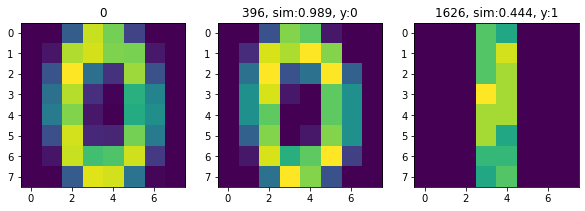

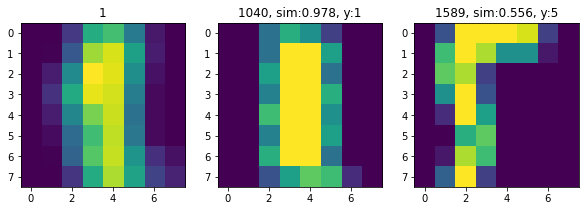

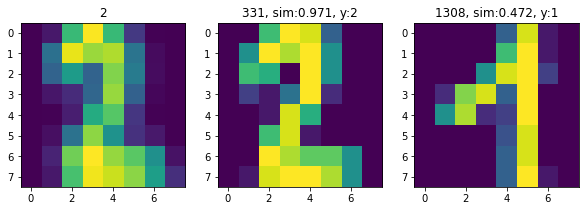

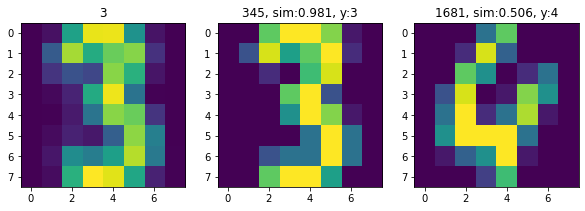

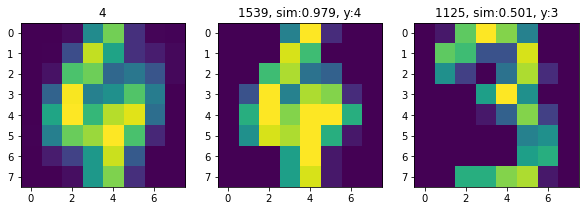

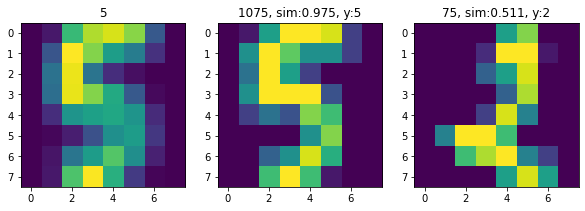

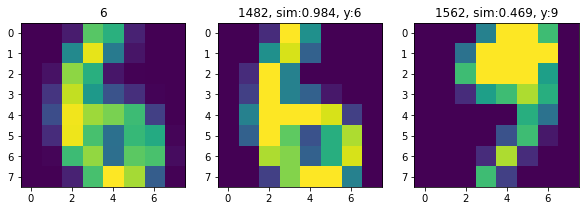

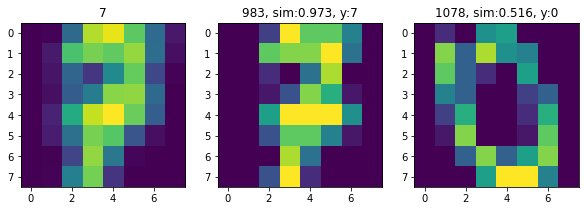

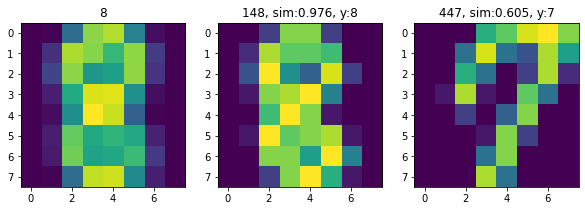

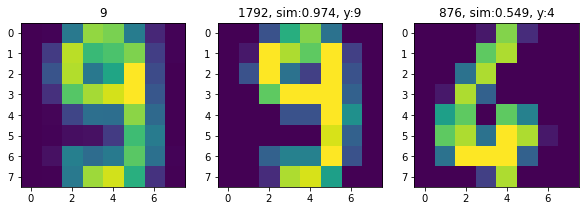

In [19]:
X=digits.data

for i in range(0, 10):

    min_idx = np.argmin(similarities[:,i])
    max_idx = np.argmax(similarities[:,i])

    fig, axs = plt.subplots(1,3,figsize=(10,10))
    
    # reference image
    axs[0].set_title(f"{i}")        
    axs[0].imshow(mean_imgs[i].reshape(8,8))
    
    # image and data with highest similarity to reference
    axs[1].set_title(f"{max_idx}, sim:{similarities[max_idx, i]:.3f}, y:{digits.target[max_idx]}")
    axs[1].imshow(X[max_idx].reshape(8,8))
    
    # image and data with lowest similarity to reference
    axs[2].set_title(f"{min_idx}, sim:{similarities[min_idx, i]:.3f}, y:{digits.target[min_idx]}")
    axs[2].imshow(X[min_idx].reshape(8,8))

plt.show()

In [20]:
tot_num_examples = X.shape[0]
brake_p = int(0.7*tot_num_examples)
test = X[brake_p:]
test_labels = digits.target[brake_p:]
train = X[:brake_p]
train_labels = digits.target[:brake_p]

In [21]:
test.shape

(540, 64)

In [22]:
train.shape

(1257, 64)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn_clasifier = KNeighborsClassifier(n_neighbors=5,algorithm = 'brute'  )

In [25]:
knn_clasifier.fit(train,train_labels)

KNeighborsClassifier(algorithm='brute')

In [26]:
train_labels.shape

(1257,)

In [27]:
train.shape


(1257, 64)

In [28]:
test_pred_labels = knn_clasifier.predict(test)

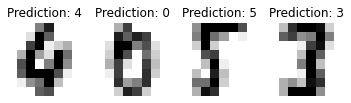

In [29]:
images_and_predictions = list(zip(digits.images[brake_p:], test_pred_labels))
for index, (image, pred) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % pred)

plt.show()

In [30]:
 from sklearn.metrics import confusion_matrix , classification_report

In [31]:
print(test_pred_labels.shape)
print(test_labels.shape)

(540,)
(540,)


In [45]:
confusion_matrix( test_labels , test_pred_labels)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  0, 51,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 49,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 47,  1],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 52]], dtype=int64)

In [46]:
confusion_matrix(test_pred_labels , test_labels)

array([[52,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 51,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 49,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 55,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 54,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 54,  1,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0, 47,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  1, 52]], dtype=int64)

In [33]:
p =classification_report(test_labels , test_pred_labels)
print(p)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



# K-mean

In [34]:
from sklearn.cluster import KMeans


In [35]:
kmeans = KMeans(n_clusters=10)

In [36]:
clusters = kmeans.fit(train)

In [37]:
cluster_labels =clusters.labels_

In [38]:
cluster_centers  =  clusters.cluster_centers_

cluster_centers.shape

(10, 64)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

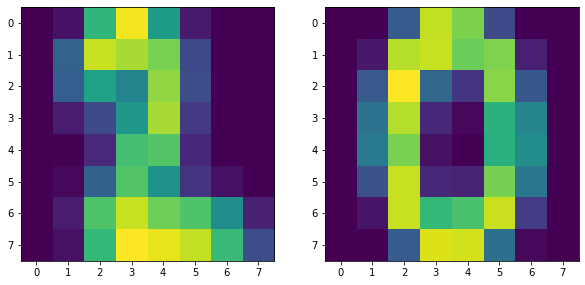

<Figure size 432x288 with 0 Axes>

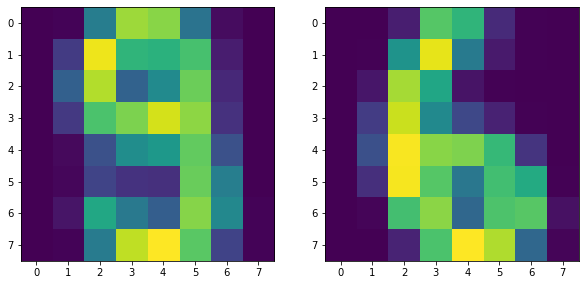

<Figure size 432x288 with 0 Axes>

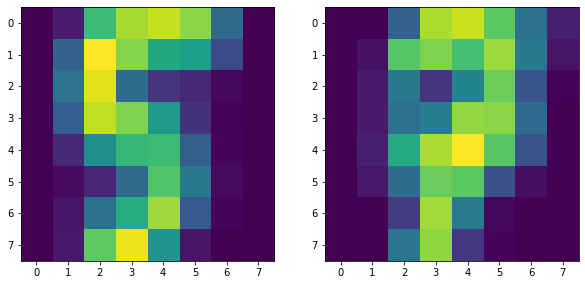

<Figure size 432x288 with 0 Axes>

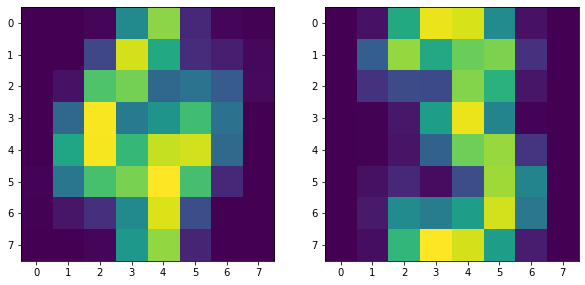

<Figure size 432x288 with 0 Axes>

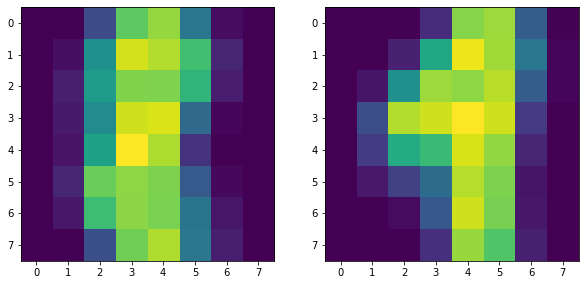

In [39]:
import matplotlib.pyplot as plt 
import numpy as np
import umap

for i in range(0,10,2):
    plt.figure()
    fig, axs = plt.subplots(1,2,figsize=(10,10))
    
    axs[0].imshow(cluster_centers[i].reshape(8,8))
    axs[1].imshow(cluster_centers[i+1].reshape(8,8))

plt.show

In [40]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

## Completeness vs homogeneity score

Full completeness if same Label have the same cluster. Compute completeness metric of a cluster labeling given a ground truth.

A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.

#### If we have all blue marbles in one cluster. And All green marbles in 


This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.



#### A cluseter is homogeinouse if all members of each clusters are in the  blongs to the same calss. which means perfect clustring.
##### {cluster 1: only blue marbles , cluster 2 : only red marbles ...}


In [41]:
from sklearn.metrics.cluster import completeness_score, homogeneity_score

print (completeness_score(train_labels , cluster_labels ))

print (  homogeneity_score(train_labels , cluster_labels ))


0.7550866000573384
0.7471227274904197


In [42]:
0.7619582078322367
0.752608148622086

0.752608148622086

### Assume cluster 0 is images of 4 . If you get a new image number 4 you can say with 74 procent confidence that it belongs to cluster 0  and vice versa 

In [43]:
metrics.adjusted_mutual_info_score( train_labels, cluster_labels)

0.7474647400140612

In [ ]:
pred_labels=clusters.predict(test)

In [ ]:
from sklearn.metrics.cluster import completeness_score, homogeneity_score

print (completeness_score(test_labels , pred_labels ))

print (  homogeneity_score(test_labels , pred_labels ))
